In [125]:
#Packages 
import numpy as np
import xarray as xr

import glob
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean.cm as cmo
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import ticker
from matplotlib.dates import DateFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

#Cartopy
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                edgecolor='face',
                                facecolor=cfeature.COLORS['land'])

states_provinces = cfeature.NaturalEarthFeature(
                   category='cultural',
                   name='admin_1_states_provinces_lines',
                   scale='110m',
                   facecolor='none')
crs = ccrs.PlateCarree(central_longitude=0)
import matplotlib.ticker as tick

### Open model output. 

In [5]:
#Relative vorticity isn't turned on until month 3 
paths = [#'/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0001-01-01_00.00.00.nc',
         #'/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0001-02-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0001-03-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0001-04-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0001-05-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0001-06-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0001-07-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0001-08-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0001-09-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0001-10-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0001-11-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0001-12-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0002-01-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0002-02-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0002-03-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0002-04-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0002-05-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0002-06-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0002-07-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0002-08-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0002-09-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0002-10-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0002-11-01_00.00.00.nc',
         '/lustre/scratch4/turquoise/dschlichting/E3SM/scratch/chicoma-cpu/240205_test1_TL319_GoM14r1_GMPAS-IAF/run/240205_test1_TL319_GoM14r1_GMPAS-IAF.mpaso.hist.am.highFrequencyOutput.0002-12-01_00.00.00.nc']

ds = []
for i in range(len(paths)):     
    ds.append(xr.open_dataset(paths[i]))

In [6]:
#Initial condition file - needed for latitutde and longitude
dsi = xr.open_dataset('/lustre/scratch5/dschlichting/runs/seahorce_231221/gom14/ocean/global_ocean/GoM5/WOA23/init/initial_state/initial_state.nc')
lat_c = np.degrees(dsi.variables['latCell'][:])
lon_c = np.degrees(dsi.variables['lonCell'][:])

In [17]:
rv = []
ke = []
for i in range(len(paths)): 
    rv.append(ds[i].relativeVorticityCell[:,:,0]/dsi.fCell)
    ke.append(ds[i].kineticEnergyAtSurface)

In [133]:
def plotCell(dsg, prop, window, ax,
             cmap=None, cmin=None, cmax=None, 
             edgefactor=1.0):
    '''return polygon (no axis provided) or mappable (if axis provided) after plotting
    
    Inputs
    ------
    dsg          MPAS-O dataset with grid Vertex information.
    prop         A dataarray on Cell-center points.
    window       A sequence of [lon_min, lon_max, lat_min, lat_max] in the units
                 of lon and lat in the simulation.
    ax           An axis object on which to plot the polygons, a mappable object is returned.
                 If axis is explicitly set to `None`, the Polygon collection is returned.
    cmin, cmax   The color limits of the color mapping. If none, the min and max of the 
                 property within the window are used.
    edgefactor   The multiplier by which to 'darken' the edges. Default of 1 is used when the edge
                 and face have the same color. Less than one for darker shades. Zero for black.
    '''
    lons = dsg.lonVertex.values[dsg.verticesOnCell-1] * 180.0 / np.pi - 360
    lats = dsg.latVertex.values[dsg.verticesOnCell-1] * 180.0 / np.pi

    inside_vert = (lons>window[0]) * (lons<window[1]) * \
                  (lats>window[2]) * (lats<window[3])
    inside_vert[dsg.verticesOnCell == 0] = True
    idx = np.all(inside_vert, axis=1)
    
    # if cmin is None:
    #     cmin = prop[idx].min().values
    # if cmax is None:
    #     cmax = prop[idx].max().values
    # if cmap is None:
    #     cmap = plt.cm.viridis
    
    norm = plt.matplotlib.colors.Normalize(cmin, cmax)

    facecolors = cmap(norm(prop.values))
    edgecolors = facecolors.copy()
    edgecolors[:,:3] *= edgefactor

    verts = np.dstack((lons[idx], lats[idx]))
    nverts = np.sum(dsg.verticesOnCell != 0, axis=1)[idx].values
    verts = [vert[:n] for vert, n in zip(verts, nverts)]
    
    polys = plt.matplotlib.collections.PolyCollection(verts,
                                                      facecolors=facecolors[idx], 
                                                      edgecolors=edgecolors[idx],
                                                      transform=ccrs.PlateCarree()
                                                     )
    
    if ax is None:
        return polys
    else:
        ax.add_collection(polys)
    
    return plt.matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

In [134]:
lons = dsi.lonVertex.values[dsi.verticesOnCell-1] * 180.0 / np.pi - 360
print(np.min(lons), np.max(lons))

-359.99891251257753 -0.0014269801355908385


In [143]:
proj = ccrs.PlateCarree()
window = np.array([-100,-90,5,30])
# window = np.array([-359, -1, -90, 90])
prop = ds[s].kineticEnergyAtSurface[t]
cmap = plt.get_cmap('magma')

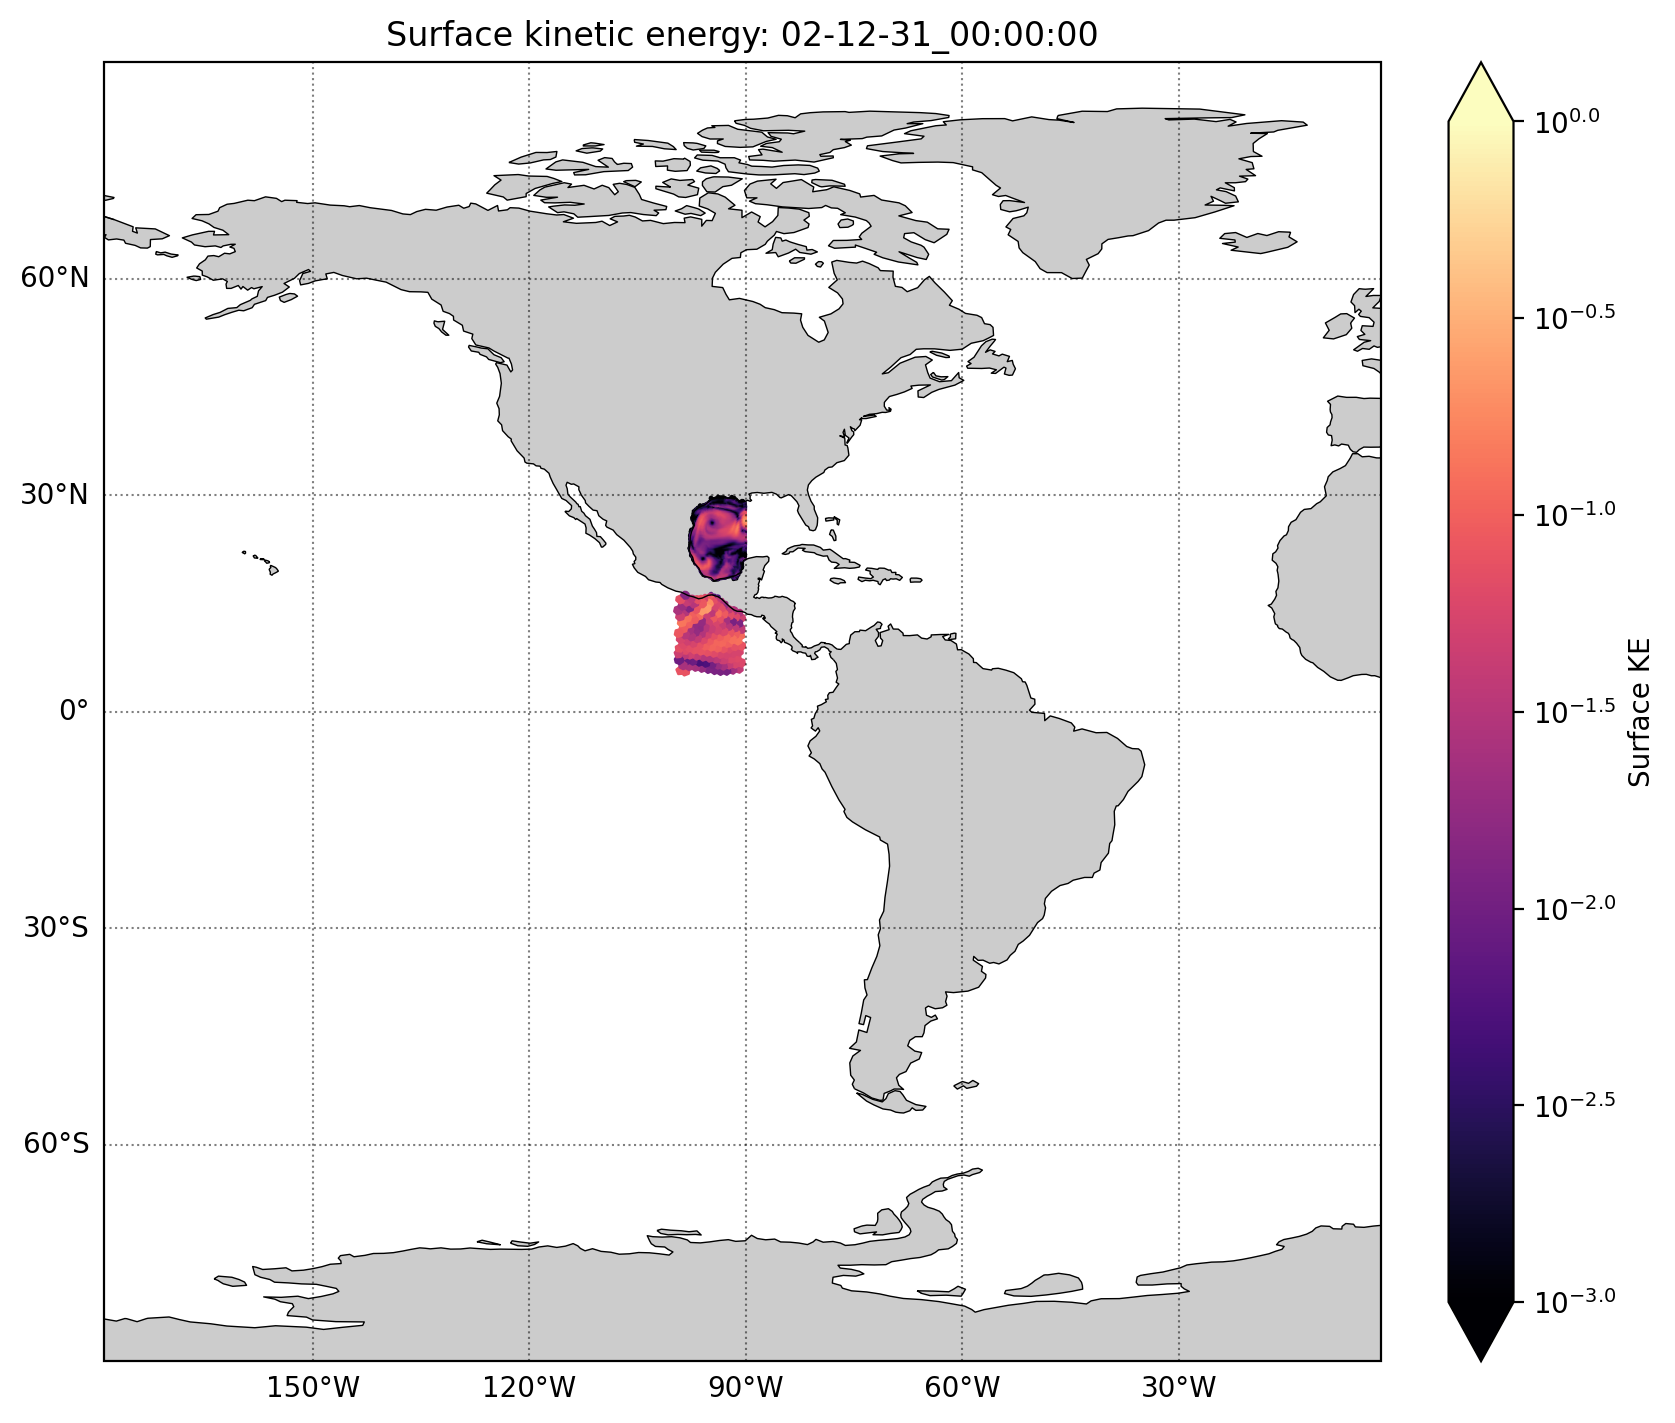

In [150]:
fig, ax = plt.subplots(1, figsize = (15,7), 
                       subplot_kw={'projection': crs}, 
                       constrained_layout = True, dpi = 200)
cb = plotCell(dsi, np.log10(ke[s][t]), window, ax, cmap=cmap, cmin=-3, cmax=0)

ax.add_feature(cfeature.LAND, facecolor='0.8')
ax.set_extent([-179, -2, -90, 90], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, lw = 0.5)
ax.set_title('Surface kinetic energy: '+str(ds[s].xtime[t].values)[4:-1])

fig.colorbar(cb, ax=ax, extend = 'both', pad = 0.025, format=tick.FormatStrFormatter('$10^{%.1f}$')).set_label('Surface KE')

gl = ax.gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True

fig.canvas.draw()
# plt.savefig('gom14_ani/gom14r1_ke_'+str(s)+'_'+str(t)+'.png', dpi = 300, bbox_inches='tight')

### Great, now turn into double for loop 

In [153]:
for s in range(len(paths)):
    for t in range(len(ds[s].xtime)):
        proj = ccrs.PlateCarree()
        window = np.array([-100,-90,5,30])
        # window = np.array([-359, -1, -90, 90])
        prop = ds[s].kineticEnergyAtSurface[t]
        cmap = plt.get_cmap('magma')
        
        fig, ax = plt.subplots(1, figsize = (15,7), 
                               subplot_kw={'projection': crs}, 
                               constrained_layout = True, dpi = 200)
        cb = plotCell(dsi, np.log10(ke[s][t]), window, ax, cmap=cmap, cmin=-3, cmax=0)
        
        ax.add_feature(cfeature.LAND, facecolor='0.8')
        ax.set_extent([-179, -2, -90, 90], ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE, lw = 0.5)
        ax.set_title('Surface kinetic energy: '+str(ds[s].xtime[t].values)[4:-1])
        
        fig.colorbar(cb, ax=ax, extend = 'both', pad = 0.025, format=tick.FormatStrFormatter('$10^{%.1f}$')).set_label('Surface KE')
        
        gl = ax.gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.right_labels = False
        gl.left_labels = True
        gl.top_labels = False
        gl.bottom_labels = True
        
        fig.canvas.draw()
        plt.savefig('gom14_ani/gom14r1_ke_'+str(s)+'_'+str(t)+'.png', dpi = 300, bbox_inches='tight')

/tmp/ipykernel_26477/510652031.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, figsize = (15,7),

KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x1470861e2710> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



Error in callback <function flush_figures at 0x14707ab7e9e0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



### Global plot, breaks at zero

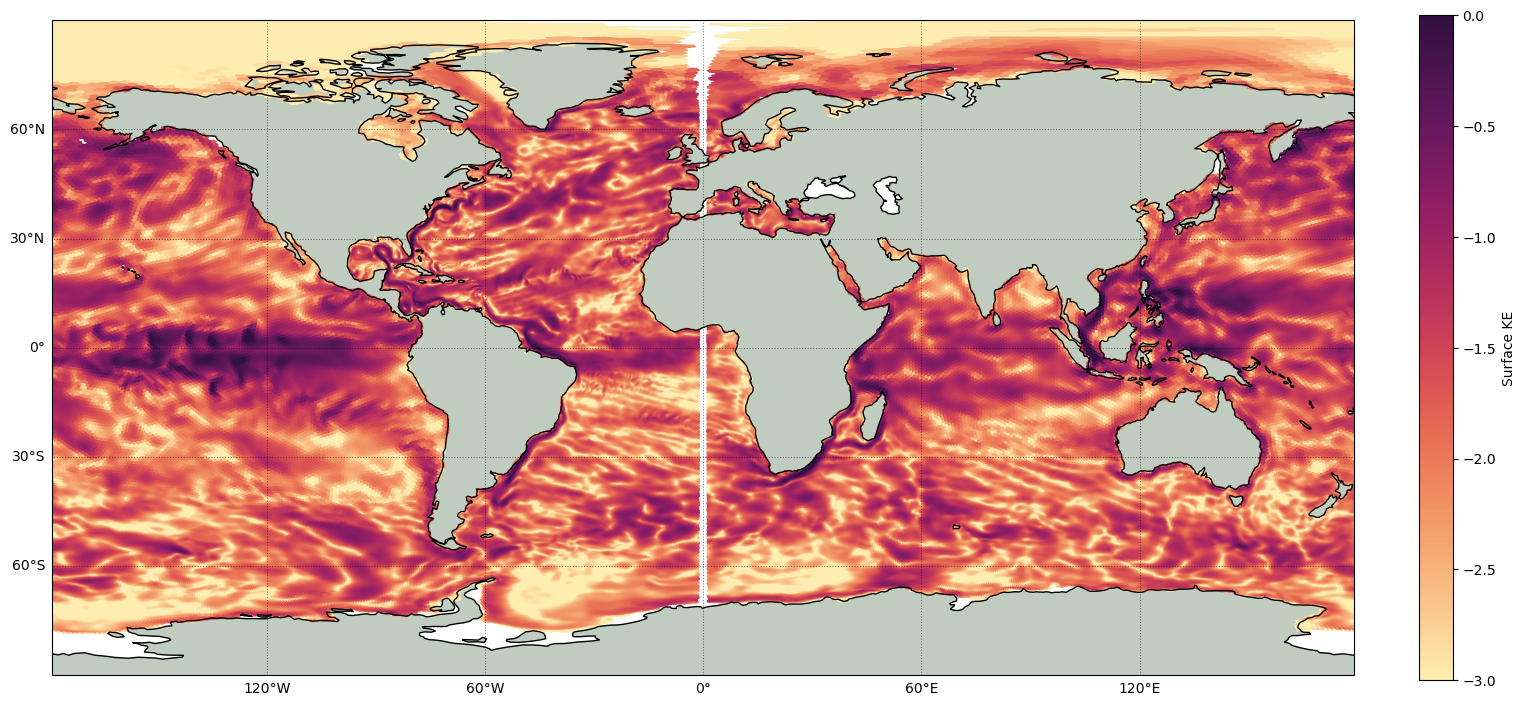

In [108]:
# fig, ax = plt.subplots(1, figsize = (15,7), 
#                        subplot_kw={'projection': crs}, 
#                        constrained_layout = True)
# cb = plotCell(dsi, np.log10(ke[s][t]), window, ax, cmap=cmap, cmin=-3, cmax=0)

# ax.add_feature(cfeature.LAND, facecolor=(0.75, 0.8, 0.75))
# ax.set_extent([-179, 179, -90, 90], ccrs.PlateCarree())
# ax.add_feature(cfeature.COASTLINE)

# fig.colorbar(cb, ax=ax).set_label('Surface KE')
# gl = ax.gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# gl.right_labels = False
# gl.left_labels = True
# gl.top_labels = False
# gl.bottom_labels = True

# fig.canvas.draw()

In [ ]:
proj = ccrs.PlateCarree()
window = np.array([-359, -1, -89, 89])
prop = ds[s].kineticEnergyAtSurface[t]
cmap = cmo.matter

fig, ax = plt.subplots(1, figsize = (15,9), 
                       subplot_kw={'projection': crs}, 
                       constrained_layout = True)
cb = plotCell(dsi, np.log10(ke[s][t]), window, ax, cmap=cmap, cmin=-3, cmax=0)

ax.add_feature(cfeature.LAND, facecolor=(0.75, 0.8, 0.75))
ax.set_extent([-179, 179, -89, 89], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

fig.colorbar(cb, ax=ax).set_label('Surface KE')
gl = ax.gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True

fig.canvas.draw()

### Great - now let's take this out of a function 

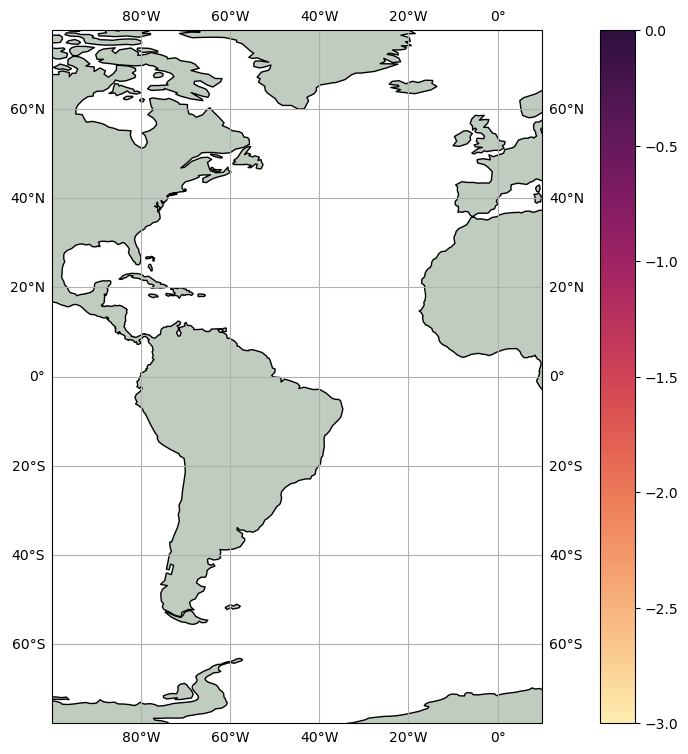

In [44]:
proj = ccrs.PlateCarree()
window = np.array([-100, 10, -70, 70])
prop = ds[s].kineticEnergyAtSurface[t]
edgefactor=1.0

lons = dsi.lonVertex.values[dsi.verticesOnCell-1] * 180.0 / np.pi - 360
lats = dsi.latVertex.values[dsi.verticesOnCell-1] * 180.0 / np.pi

inside_vert = (lons>window[0]) * (lons<window[1]) * \
              (lats>window[2]) * (lats<window[3])
inside_vert[dsi.verticesOnCell == 0] = True
idx = np.all(inside_vert, axis=1)

verts = np.dstack((lons[idx], lats[idx]))
nverts = np.sum(dsi.verticesOnCell != 0, axis=1)[idx].values
verts = [vert[:n] for vert, n in zip(verts, nverts)]

cmin = -3; cmax = 0
norm = plt.matplotlib.colors.Normalize(cmin, cmax)
norm = plt.matplotlib.colors.Normalize(cmin, cmax)

facecolors = cmap(norm(prop.values))
edgecolors = facecolors.copy()
edgecolors[:,:3] *= edgefactor

polys = plt.matplotlib.collections.PolyCollection(verts,
                                                  facecolors=facecolors[idx], 
                                                  edgecolors=edgecolors[idx],
                                                  transform=ccrs.PlateCarree()
                                                 )
ax.add_collection(polys)
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection=proj)
plt.matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
ax.add_feature(cfeature.LAND, facecolor=(0.75, 0.8, 0.75))
ax.add_feature(cfeature.COASTLINE)

plt.colorbar(cb, ax=ax).set_label('')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.set_extent(window)

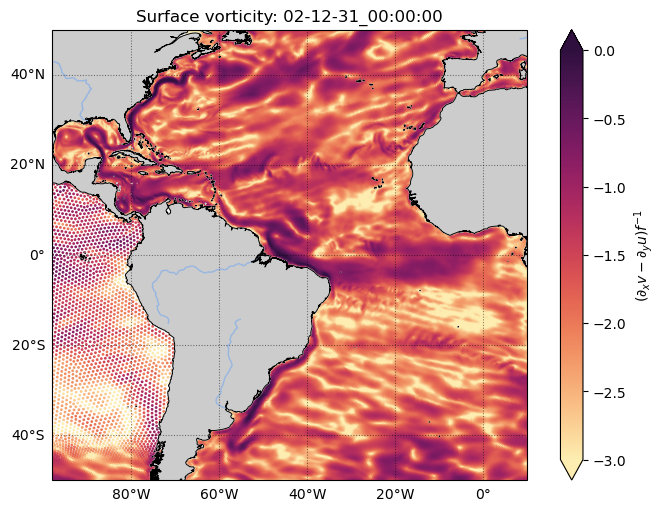

In [20]:
s = -1; t = -1
fig, ax = plt.subplots(1, figsize = (8,5), 
                       subplot_kw={'projection': crs}, 
                       constrained_layout = True)

lat_rad = 1.0/np.cos(np.radians(lat_c.mean().values))

m = ax.scatter(lon_c,lat_c,c=np.log10(ke[s][t]),
               cmap=plt.get_cmap('cmo.matter'),
               vmin=-3,vmax=0, s= 1,
               transform = ccrs.PlateCarree())

ax.set_extent([-98, 10, -50, 50], ccrs.PlateCarree())

ax.add_feature(land_10m, facecolor='0.8')
ax.set_aspect(lat_rad)
ax.add_feature(cartopy.feature.RIVERS, linewidth=1)
ax.coastlines(resolution='10m', linewidth = 0.65)  
fig.colorbar(m, ax = ax, label = r'', extend = 'both')

gl = ax.gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True
ax.set_title('Surface vorticity: '+str(ds[s].xtime[t].values)[4:-1])
fig.canvas.draw()

# plt.savefig('mpas_relvort_2pt5_km.png', dpi = 300, bbox_inches='tight')

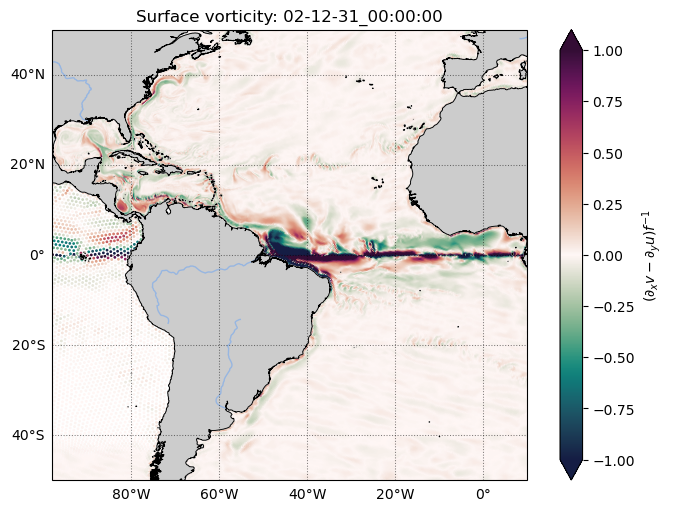

In [13]:
s = -1; t = -1
fig, ax = plt.subplots(1, figsize = (8,5), 
                       subplot_kw={'projection': crs}, 
                       constrained_layout = True)

lat_rad = 1.0/np.cos(np.radians(lat_c.mean().values))

m = ax.scatter(lon_c,lat_c,c=rv[s][t],
               cmap=plt.get_cmap('cmo.curl'),
               vmin=-1,vmax=1, s= 1,
               transform = ccrs.PlateCarree())

ax.set_extent([-98, 10, -50, 50], ccrs.PlateCarree())

ax.add_feature(land_10m, facecolor='0.8')
ax.set_aspect(lat_rad)
ax.add_feature(cartopy.feature.RIVERS, linewidth=1)
ax.coastlines(resolution='10m', linewidth = 0.65)  
fig.colorbar(m, ax = ax, label = r'$(\partial_x v - \partial_y u) f^{-1}$', extend = 'both')

gl = ax.gridlines(linewidth=0.75, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True
ax.set_title('Surface vorticity: '+str(ds[s].xtime[t].values)[4:-1])
fig.canvas.draw()

# plt.savefig('mpas_relvort_2pt5_km.png', dpi = 300, bbox_inches='tight')